# Color Threshold, Blue Screen

### Import resources

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/Udacity/Computer Vision Nanodegree/CVND_Exercises/1_1_Image_Representation'

/content/drive/MyDrive/Udacity/Computer Vision Nanodegree/CVND_Exercises/1_1_Image_Representation


### Read in and display the image

In [30]:
# Read in the image
image = cv2.imread('images/kira.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)

This image is: <class 'numpy.ndarray'>  with dimensions: (533, 800, 3)


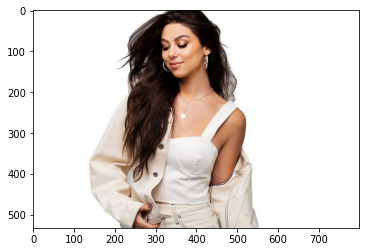

In [31]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

In [32]:
# checking the color value of her top/cloth
image_copy[200, 450]

array([11,  0,  0], dtype=uint8)

### Define the color threshold

In [47]:
## TODO: Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_white = np.array([245,245,250]) 
upper_white = np.array([255,255,255])

### Create a mask

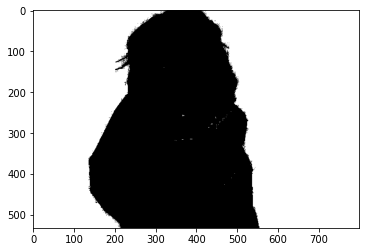

In [48]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_white, upper_white)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

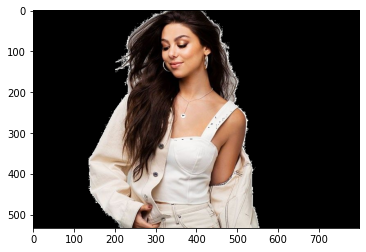

In [51]:
# Mask the image to let the pizza/picture show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

### Mask and add a background image

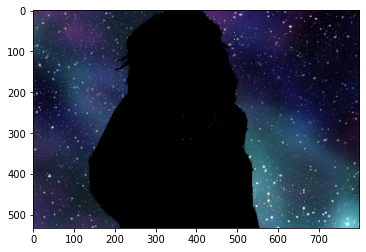

In [61]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (533x800)
crop_background = background_image[0:533, 0:800]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

### Create a complete image

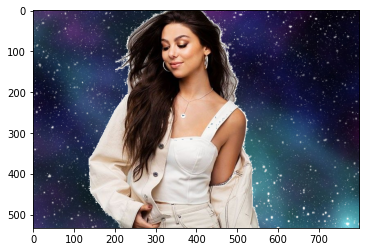

In [62]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)